## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [25]:
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


## 2.1 No scaled y dataset evaluatioin

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=50000), n_jobs=-1, cv=cv,
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=False))

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -3.08364291e+01             nan -3.07813943e+01
             nan -3.07585901e+01             nan -3.06531476e+01
 -1.30784091e+01 -1.58502358e+01 -1.39429951e+01 -1.60034650e+01
 -1.28921786e+01 -1.62191165e+01 -1.64892099e+01 -2.47793322e+01
 -1.52768427e+01 -3.04447829e+01 -1.68154434e+01 -3.21174877e+01
 -1.76718206e+01 -3.24232044e+01 -1.23894699e+01 -3.88156963e+01
 -1.66487339e+01 -2.22345844e+01 -1.64235199e+01 -2.13207418e+01
 -1.61263097e+01 -2.02144388e+01 -4.76832192e+46 -2.19412974e+01]
  category=UserWarning


{'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, mlp, cv=cv, scaling=False)

## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=50000), n_jobs=-1, cv=cv,
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=True))

{'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, mlp, cv=cv, scaling=True)

## 3.0 Model testing settings

In [6]:
from lib.fundamental_lib import make_dict
datas = make_dict('Windowed_{}_PCA_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

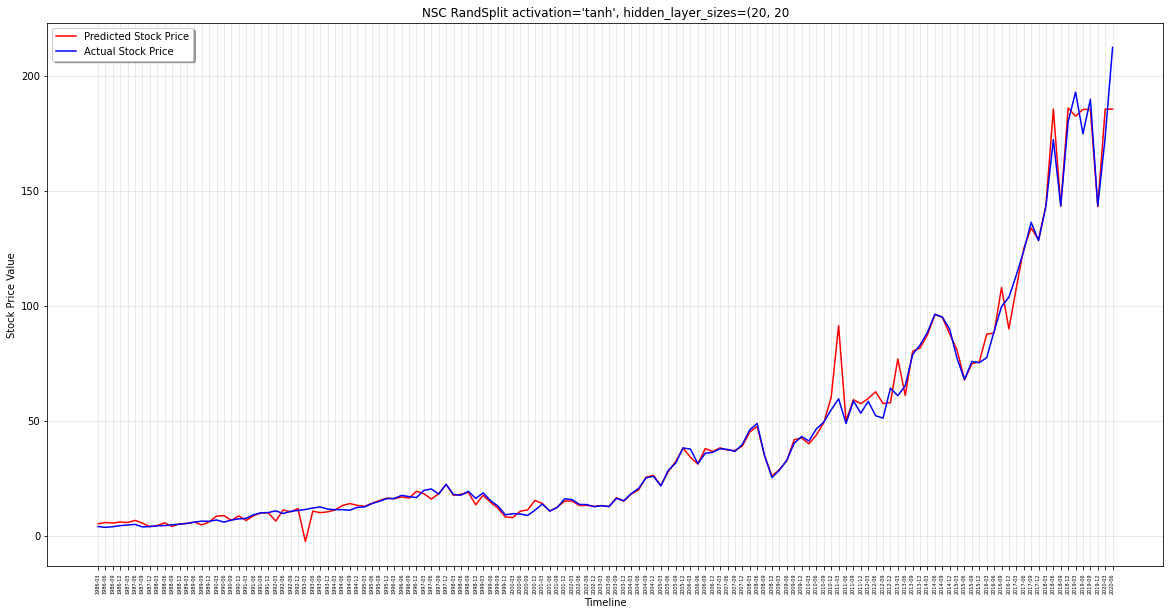

NSC MODEL RESULTS
 RMSE
 	Test: 8.752685181954817
 MAPE
 	Test: 0.20167341196436525
 MAE
 	Test: 5.445373954717455
 R2 Score Adj
 	Test: 1.0200483669110993



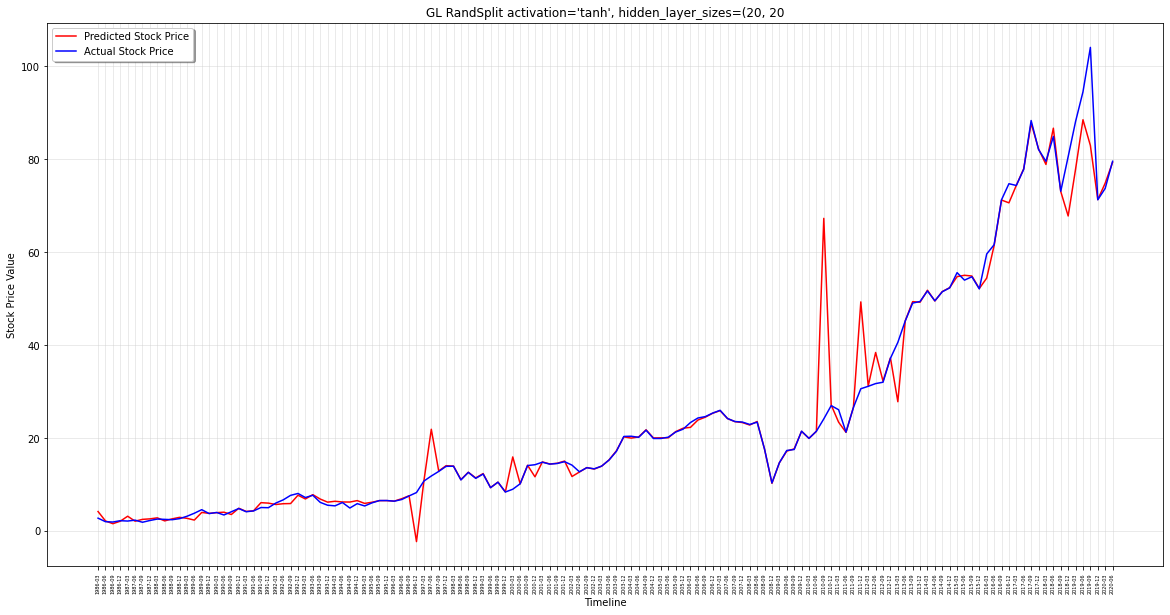

GL MODEL RESULTS
 RMSE
 	Test: 11.130676607072152
 MAPE
 	Test: 0.3442337304759229
 MAE
 	Test: 6.454031287453013
 R2 Score Adj
 	Test: 1.1209384934674207



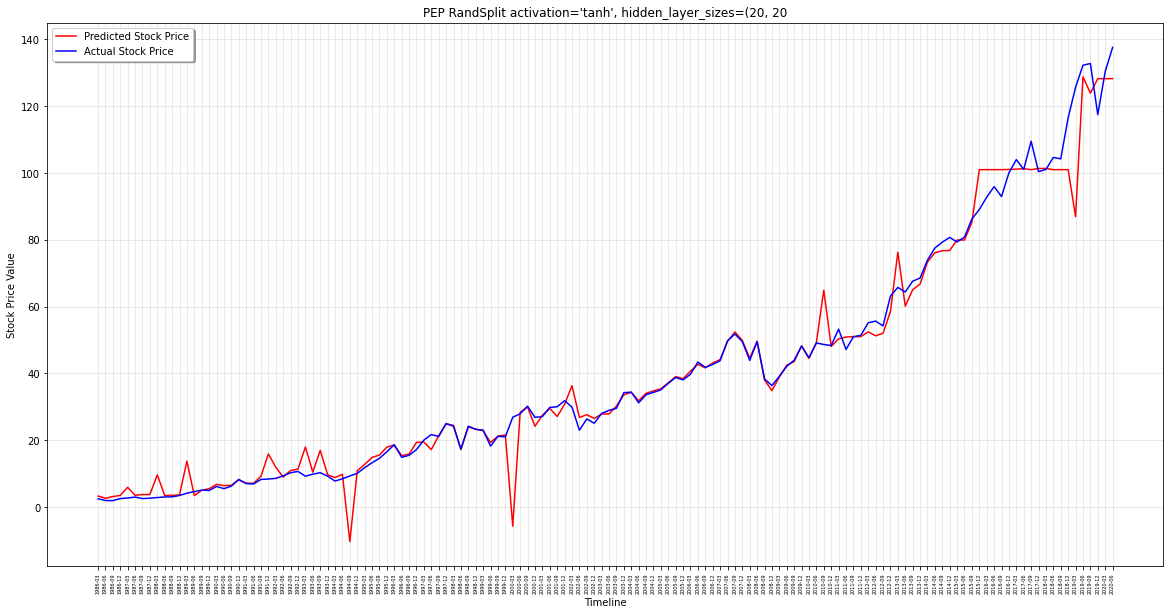

PEP MODEL RESULTS
 RMSE
 	Test: 12.184542563354656
 MAPE
 	Test: 0.5466253545580427
 MAE
 	Test: 8.064778199622806
 R2 Score Adj
 	Test: 1.076157644293262



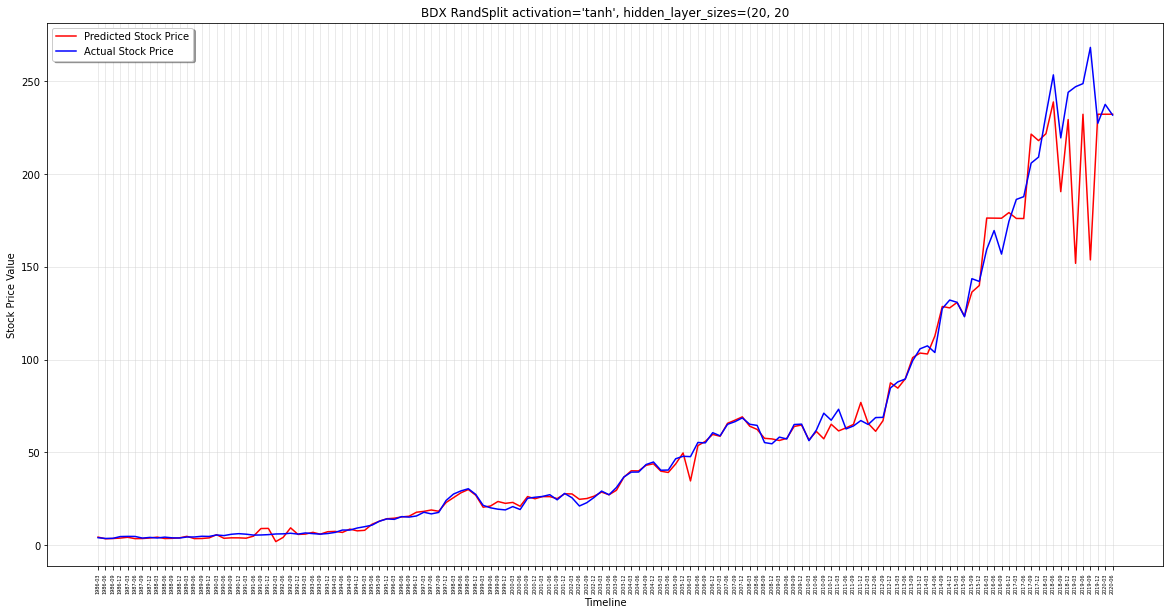

BDX MODEL RESULTS
 RMSE
 	Test: 28.925072444665314
 MAPE
 	Test: 0.18032244228220426
 MAE
 	Test: 11.75388188011286
 R2 Score Adj
 	Test: 1.1062684801978775



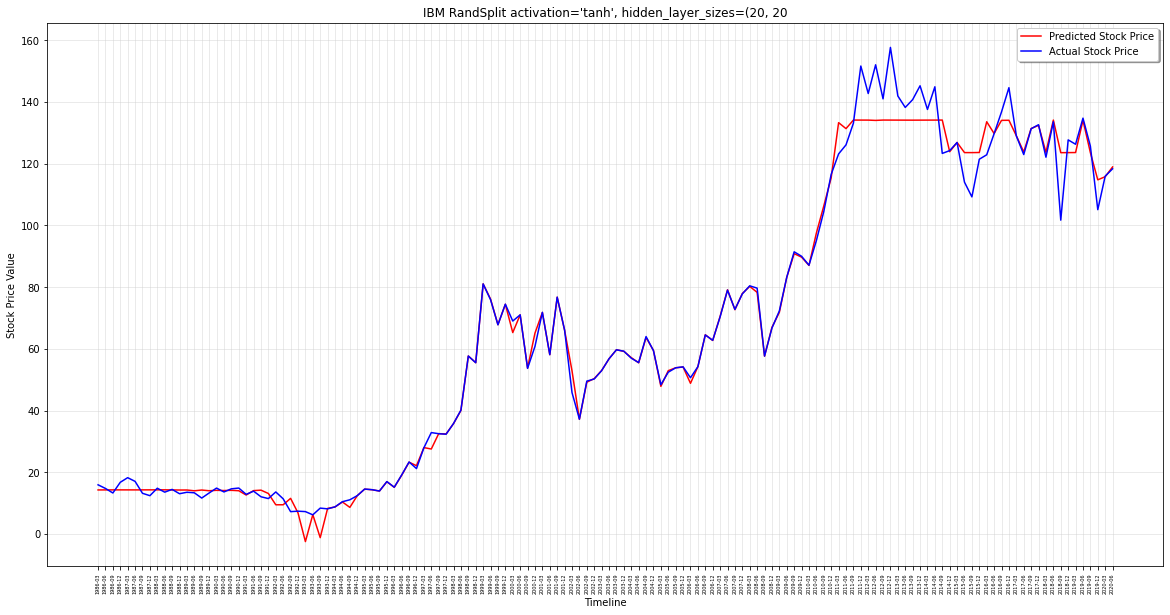

IBM MODEL RESULTS
 RMSE
 	Test: 7.0867741745897215
 MAPE
 	Test: 0.17916045700179942
 MAE
 	Test: 5.248396448887503
 R2 Score Adj
 	Test: 1.0138123736535984



In [7]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
Params={'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=False, start='1986-03')

## 3.2 Random split - Scaled prediction variable

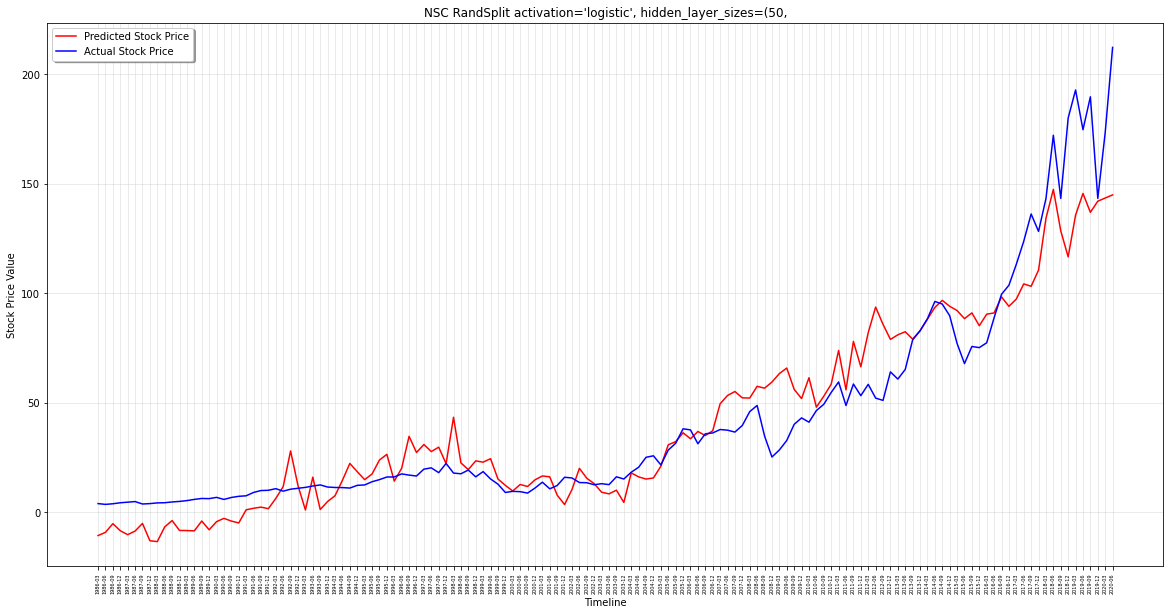

NSC MODEL RESULTS
 RMSE
 	Test: 23.010016663455584
 MAPE
 	Test: 1.0026085727310394
 MAE
 	Test: 16.355615183274036
 R2 Score Adj
 	Test: 1.1385575681276212



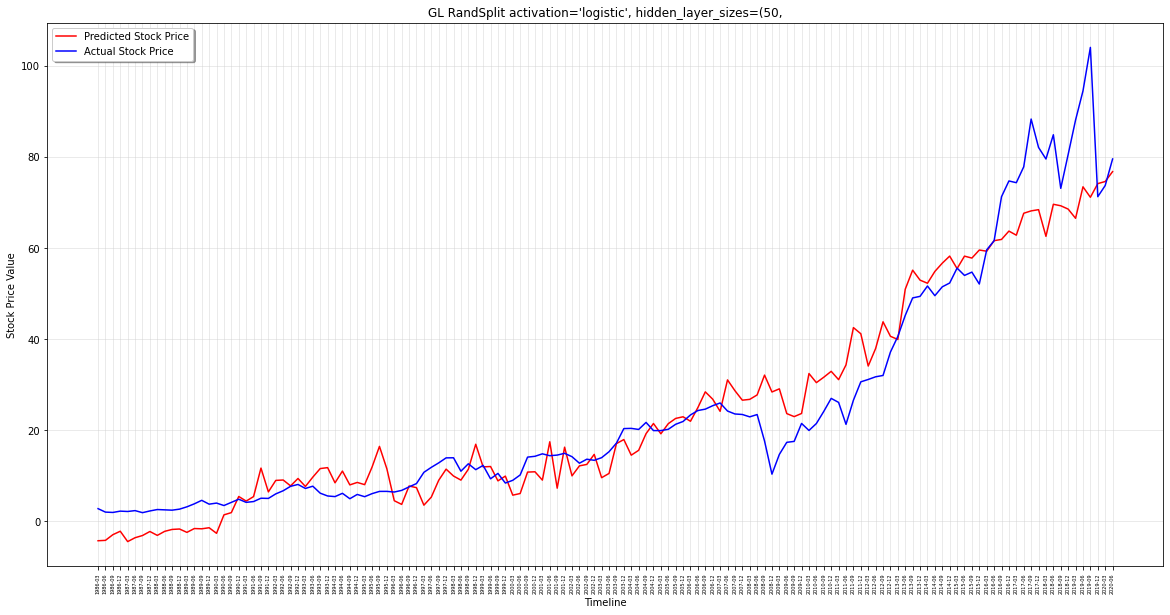

GL MODEL RESULTS
 RMSE
 	Test: 9.32738953106128
 MAPE
 	Test: 0.7426335305715437
 MAE
 	Test: 6.522168148042078
 R2 Score Adj
 	Test: 1.0849261923354787



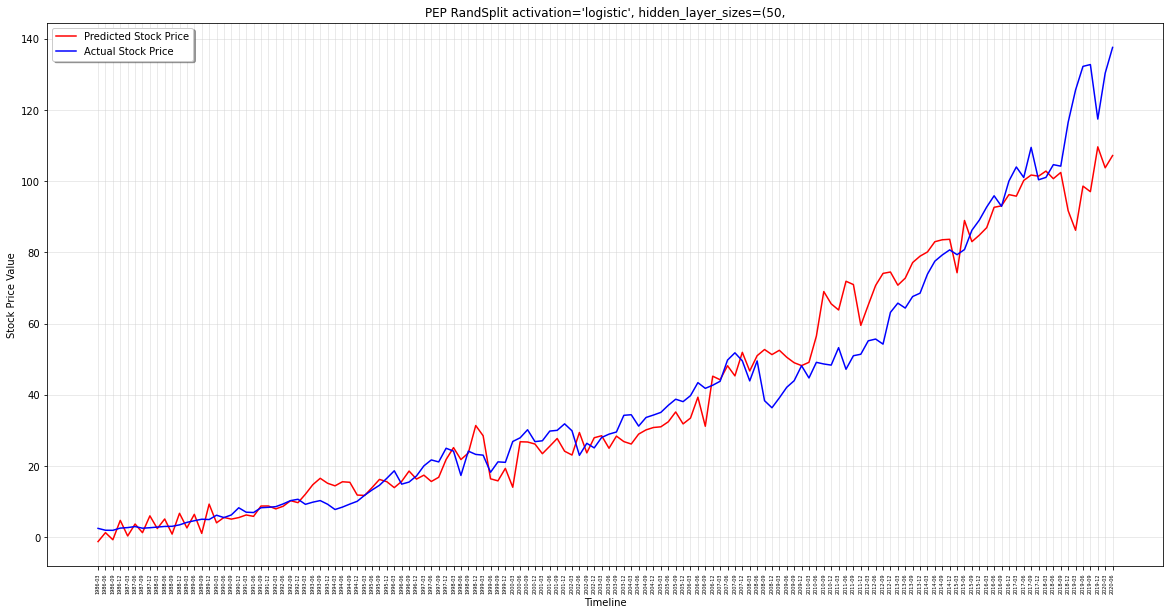

PEP MODEL RESULTS
 RMSE
 	Test: 13.019678244580545
 MAPE
 	Test: 0.34368095236962937
 MAE
 	Test: 8.268898364058867
 R2 Score Adj
 	Test: 1.0869551976366756



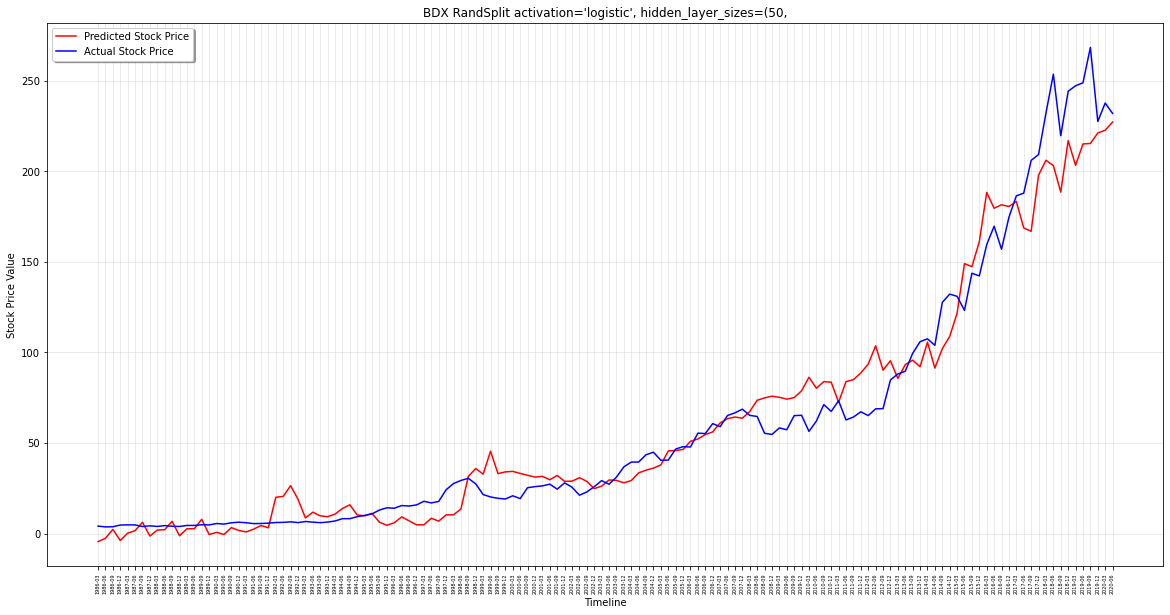

BDX MODEL RESULTS
 RMSE
 	Test: 17.924899708125636
 MAPE
 	Test: 0.4844320925685429
 MAE
 	Test: 11.679443928325757
 R2 Score Adj
 	Test: 1.0408102286189844



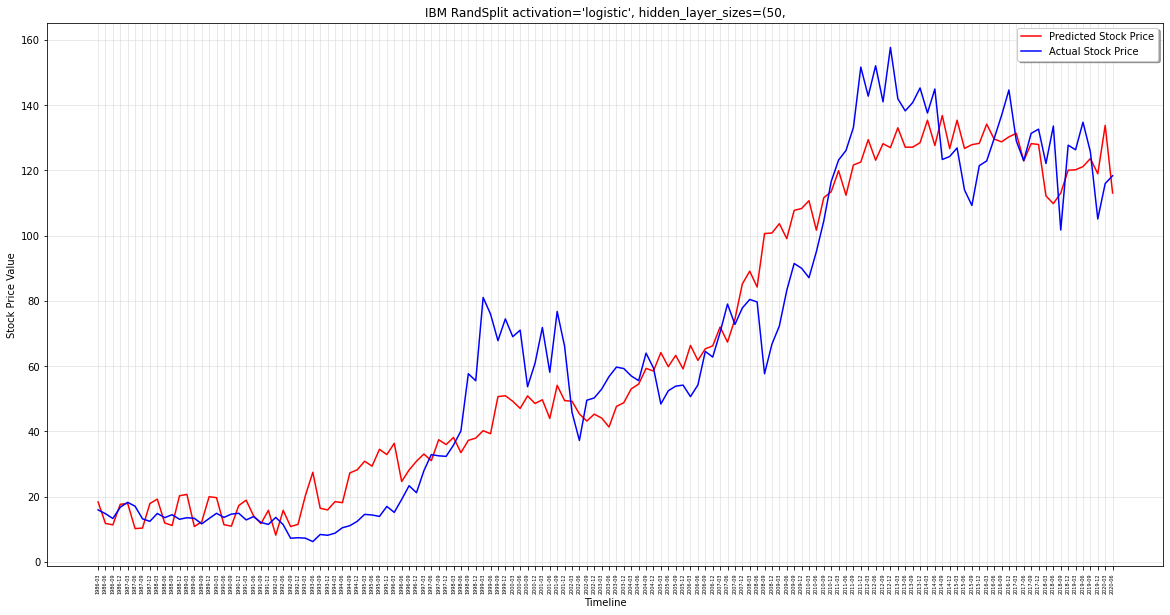

IBM MODEL RESULTS
 RMSE
 	Test: 11.631476235461529
 MAPE
 	Test: 0.30745589459445366
 MAE
 	Test: 8.844865837884063
 R2 Score Adj
 	Test: 1.0372083837896953



In [8]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'sgd'} #error
Params={'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=True, start='1986-03')

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
Params={'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=True)